# Introduction

## Context

Hello World!

In this notebook, I intend to explore fundamental concepts of [LangChain](https://www.langchain.com/). The term LangChain has rapidly become a common household term for anyone working in even the remote vacinity of AI/LLMs. However, for those that are looking to get into this domain and start exploring, it can be quite a frustrating task to understand where to start. In fact, due to a lack of access to a "Beginners Guide", I often see many people discouraged and give up before even starting! This is the first gap I hope to bridge with this notebook.

Additionally, I've come across numerous introductory articles and videos on LangChain that describe it in vague, abstract terms. These "hazy explanations" seem to be made with ill intent. Rather than spending time to learn concepts in-depth and teaching us how to implement them, these creators seek to have catchy clickbait titles with shallow explanations so that they can move on to churning more clickbait on other trending topics. After going through such content, I am left even more flustered and demotivated to explore further. The second gap I intend to address in this notebook is digesting concepts through implimentation.

**LangChain concepts I intend to address in this notebook:**
1. What is LangChain?
2. Why should we use LangChain?
3. LangChain Components:
    - LLM Classes
    - Prompt Templates
    - Chains
    - Runnables

**Additional concepts that will get covered:**
1. Duckduckgo Search Results via API
2. Webscraping with BeautifulSoup

## Use Case

As stated, I want this note book to be an explanation via implemntation. So first, let us come up with an exciting use case for leveraging LangChain.

Huh, how do we do this? Without fundamentally knowing what LangChain is, how can we identify a use case for implementing it?

Well, we could just ask ChatGPT!

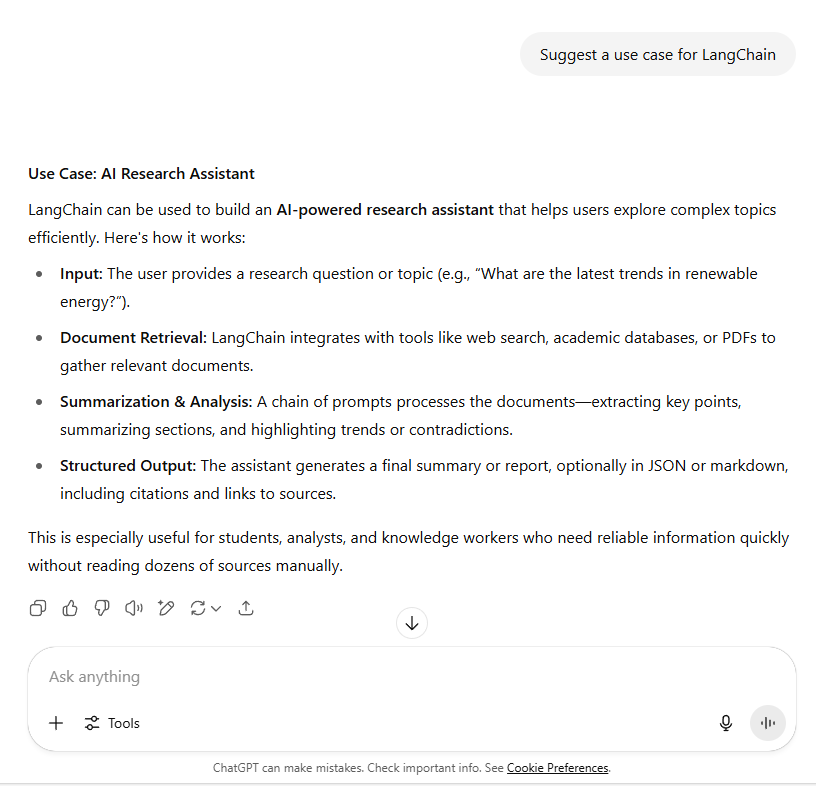

**Please note, every time we get to a roadblock and not know how to proceed, AI is our friend!**

Well, we now  have a use case!

**So, let's get started!**

# Step 1: Querying an LLM